<a href="https://colab.research.google.com/github/Alwin1847207/Diamonds_Data_Analysis_MLPClassifier/blob/master/Diamonds_Data_Analysis_MLPClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link: https://www.kaggle.com/shivam2503/diamonds

Importing Packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading file

In [2]:
dia=pd.read_csv("diamonds.csv")
dia.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Dataset understanding

In [3]:
dia.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

Droping unrelated column

In [4]:
dia = dia.drop(["Unnamed: 0"],axis=1)

In [5]:
dia.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Checking for null values

In [6]:
dia.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

Shape of dataset

In [7]:
print(dia.shape)

(53940, 10)


Price distribution

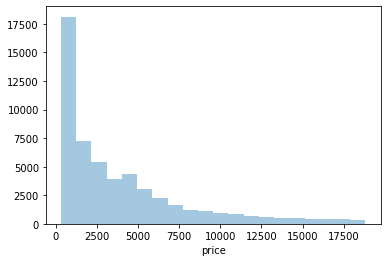

In [8]:
sns.distplot(dia.price, kde = False , bins= 20);

Ratio of carrat and colour

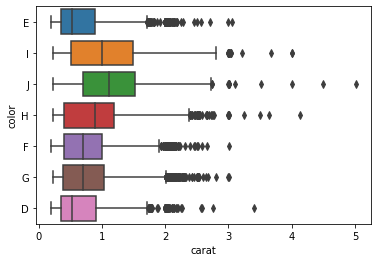

In [9]:
sns.boxplot (x="carat",y="color",data=dia);

Price and carrat

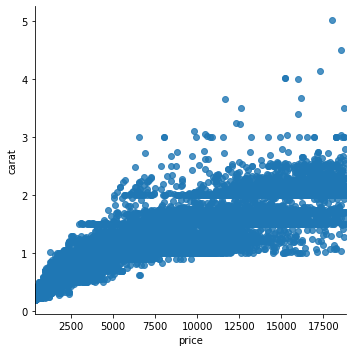

In [10]:
sns.lmplot(x="price",y="carat", data=dia);

Correlation of variables

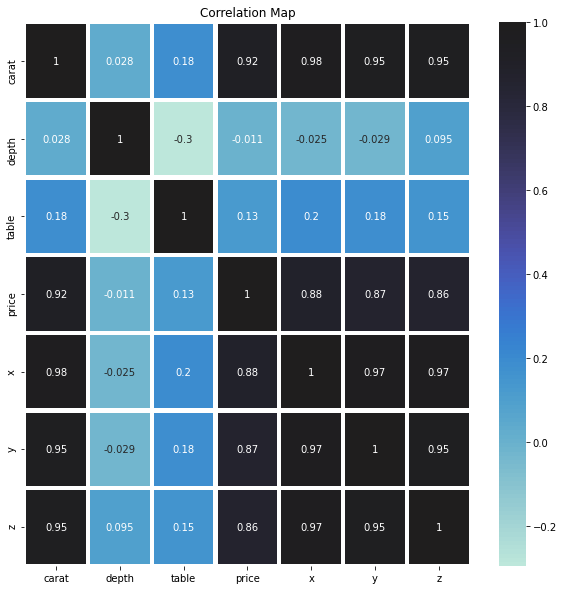

In [11]:
plt.figure(figsize=(10,10))
plt.title('Correlation Map')
ax=sns.heatmap(dia.corr(),linewidth=3.1,annot=True,center=1)

Pair plot

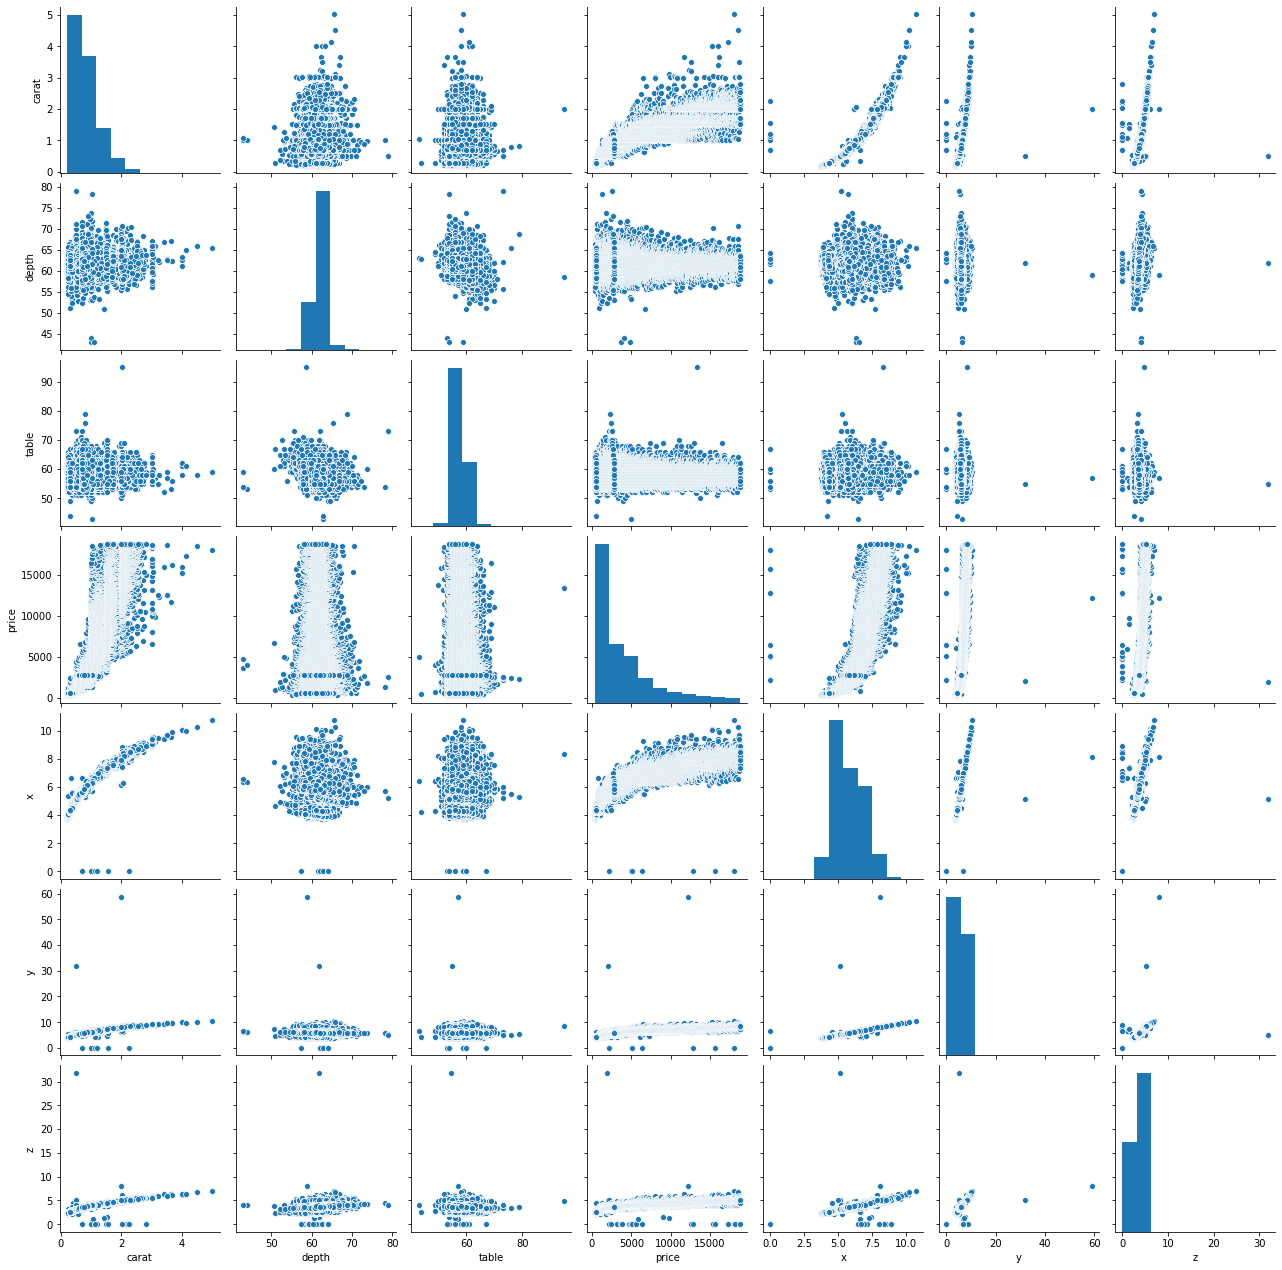

In [12]:
sns.pairplot(dia)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


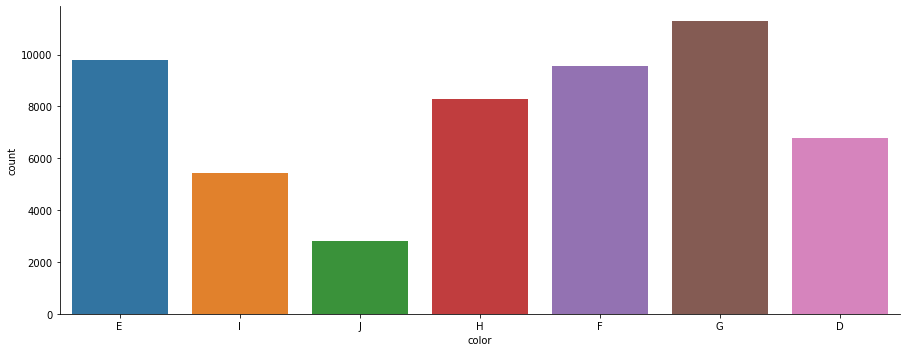

In [13]:
p = sns.factorplot(x='color', data=dia , kind='count',aspect=2.5 )

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


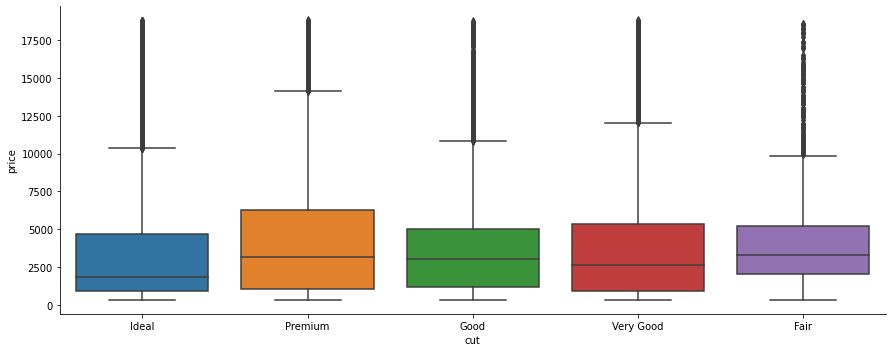

In [14]:
p = sns.factorplot(x='cut', y='price', data=dia, kind='box' ,aspect=2.5 )

In [15]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Label encoding

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dia.clarity = le.fit_transform(dia.clarity)
dia.color = le.fit_transform(dia.color)
dia.cut = le.fit_transform(dia.cut)

In [17]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


Normalization

In [18]:
from sklearn import preprocessing
nm = preprocessing.StandardScaler()
dia[['depth','table','price','carat','color','clarity','x','y','z']] = nm.fit_transform(dia[['depth','table','price','carat','color','clarity','x','y','z']])

In [19]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.198168,2,-0.937163,-0.484264,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,3,-0.937163,-1.064117,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,-1.198168,1,-0.937163,0.095589,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,-1.071587,3,1.414272,0.675442,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,-1.029394,1,2.002131,-0.484264,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674


Applaying NN

In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
y = dia['cut']
x = dia.drop(["cut"],axis=1)

In [22]:
y.head()

0    2
1    3
2    1
3    3
4    1
Name: cut, dtype: int64

In [23]:
x.head()

,carat,color,clarity,depth,table,price,x,y,z
0,-1.198168,-0.937163,-0.484264,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,-0.937163,-1.064117,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,-1.198168,-0.937163,0.095589,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,-1.071587,1.414272,0.675442,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,-1.029394,2.002131,-0.484264,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [25]:
mlp=MLPClassifier(verbose=True)

In [26]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 1.19730994
Iteration 2, loss = 0.93705746
Iteration 3, loss = 0.84732455
Iteration 4, loss = 0.80883312
Iteration 5, loss = 0.78748146
Iteration 6, loss = 0.77184309
Iteration 7, loss = 0.76042474
Iteration 8, loss = 0.75134485
Iteration 9, loss = 0.74371113
Iteration 10, loss = 0.73662053
Iteration 11, loss = 0.72986139
Iteration 12, loss = 0.72426193
Iteration 13, loss = 0.71840723
Iteration 14, loss = 0.71311071
Iteration 15, loss = 0.70740171
Iteration 16, loss = 0.70233267
Iteration 17, loss = 0.69745722
Iteration 18, loss = 0.69284104
Iteration 19, loss = 0.68710737
Iteration 20, loss = 0.68291627
Iteration 21, loss = 0.67762769
Iteration 22, loss = 0.67361318
Iteration 23, loss = 0.66845312
Iteration 24, loss = 0.66412184
Iteration 25, loss = 0.66088525
Iteration 26, loss = 0.65628300
Iteration 27, loss = 0.65210796
Iteration 28, loss = 0.64862146
Iteration 29, loss = 0.64507250
Iteration 30, loss = 0.64055452
Iteration 31, loss = 0.63689466
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [27]:
mlp.score(x_test, y_test)

0.7759856630824373

In [28]:
mlp.predict(x_test)

array([4, 3, 1, ..., 0, 4, 2])

In [29]:
mlp.predict_proba(x_test)

array([[1.62386723e-02, 3.98427623e-01, 1.67221052e-02, 7.59715422e-02,
        4.92640057e-01],
       [7.14833760e-04, 5.06979840e-02, 7.45742192e-02, 6.74381060e-01,
        1.99631903e-01],
       [6.12895668e-03, 8.94709153e-01, 2.73461971e-05, 1.04543553e-18,
        9.91345443e-02],
       ...,
       [7.05828406e-01, 2.93684681e-01, 8.02020475e-05, 7.76072732e-43,
        4.06711497e-04],
       [1.29238358e-04, 4.02303045e-02, 1.05099708e-01, 2.86543072e-01,
        5.67997677e-01],
       [7.40032524e-05, 6.88828061e-04, 9.53017616e-01, 1.92899823e-02,
        2.69295709e-02]])

In [30]:
mlp.loss_

0.5480545479827231

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(mlp.predict(x_test),y_test)

array([[ 352,   39,    2,    1,    0],
       [  64,  931,   17,   18,  328],
       [   3,   17, 5870,  434,  839],
       [  14,   21,  231, 3292,  373],
       [   7,  492,  293,  432, 2112]])

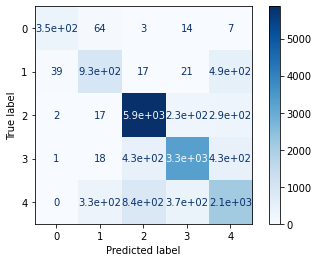

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp,x_test,y_test,cmap=plt.cm.Blues)